Credit by Haris Situmeang

In [1]:
# connecting google colab with google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# directory to my project folder declare as root path
root_path = '/content/drive/My Drive/Colab Notebooks/DICODING/'

In [3]:
# import modules
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import math
import os

Using TensorFlow backend.


In [0]:
# declare path to train directory and validation directory
train_dir = os.path.join(root_path, 'dataset/rockpaperscissors/train')
val_dir = os.path.join(root_path, 'dataset/rockpaperscissors/val')

In [5]:
# input image 200x300 pixels
input_size = (200,300)
batch_size = 32

# data augmentation
augs_datagen = ImageDataGenerator(
    rescale=1./255,        
    horizontal_flip=True,
    height_shift_range=0.2,
    vertical_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = augs_datagen.flow_from_directory(
    train_dir, 
    target_size=input_size, 
    batch_size=batch_size,
    class_mode='categorical')

val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='categorical')

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [0]:
# create sequential model
model = Sequential([
  # layer 1
  Conv2D(32 , (3,3) , activation='relu', input_shape=(200,300,3)),
  MaxPooling2D(pool_size=(2,2)),

  # layer 2
  Conv2D(64 ,(3,3), activation='relu'),
  MaxPooling2D(pool_size= (2,2)),

  # layer 3
  Conv2D(64 , (3,3), activation='relu'),
  MaxPooling2D(pool_size= (2,2)),

  # output layer
  Flatten(),
  Dense(512, activation='relu'),  
  Dropout(0.5),
  Dense(64, activation='relu'),
  Dropout(0.5),
  Dense(3,activation='softmax')                  
])

In [7]:
# model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 298, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 149, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 147, 64)       18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 73, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 35, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 51520)            

In [0]:
# Callback
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=10,
    verbose=1,
    mode='auto'
)

callbacks = [earlystop]

In [0]:
epochs = 15
lr = 0.0001
# momentum = 0.99

# compiling the model using categorical crossentropy for loss and SGD for optimizer
# model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=lr, momentum=momentum), metrics=['accuracy'])
# compiling the model using categorical crossentropy for loss and Adam for optimizer
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=lr), metrics=['accuracy'])

In [0]:
train_size = 1751
val_size = 437

compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / batch_size))

steps_per_epoch = compute_steps_per_epoch(train_size)
validation_steps = compute_steps_per_epoch(val_size)

In [11]:
%%time
history = model.fit(
      train_generator, # get the train generator to train the data train
      steps_per_epoch=steps_per_epoch,  # batch executed on every epoch
      epochs=epochs, # epoch
      validation_data=val_generator, # showing val_acc and val_loss on training
      validation_steps=validation_steps,  # batch executed on every epoch
      verbose=1, # verbose option for showing training progress
      callbacks=callbacks) # using earlystop callbacks

Epoch 1/15
55/55 [==============================] - 115s 2s/step - loss: 1.0931 - accuracy: 0.3855 - val_loss: 1.0267 - val_accuracy: 0.5240
Epoch 2/15
55/55 [==============================] - 112s 2s/step - loss: 1.0030 - accuracy: 0.4717 - val_loss: 0.8576 - val_accuracy: 0.6796
Epoch 3/15
55/55 [==============================] - 119s 2s/step - loss: 0.9194 - accuracy: 0.5523 - val_loss: 0.8476 - val_accuracy: 0.7391
Epoch 4/15
55/55 [==============================] - 112s 2s/step - loss: 0.7922 - accuracy: 0.6682 - val_loss: 0.6455 - val_accuracy: 0.7986
Epoch 5/15
55/55 [==============================] - 112s 2s/step - loss: 0.7117 - accuracy: 0.7053 - val_loss: 0.6614 - val_accuracy: 0.8673
Epoch 6/15
55/55 [==============================] - 112s 2s/step - loss: 0.6140 - accuracy: 0.7727 - val_loss: 0.3811 - val_accuracy: 0.8764
Epoch 7/15
55/55 [==============================] - 113s 2s/step - loss: 0.4889 - accuracy: 0.8212 - val_loss: 0.2984 - val_accuracy: 0.9108
Epoch 8/15
55

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


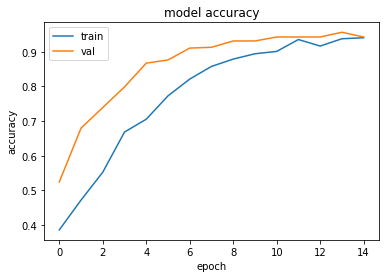

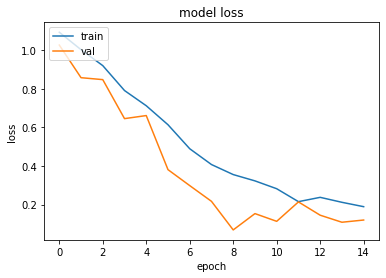

In [12]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Saving 1MOm36DHK0R8OfIC.png to 1MOm36DHK0R8OfIC.png
1MOm36DHK0R8OfIC.png
rock


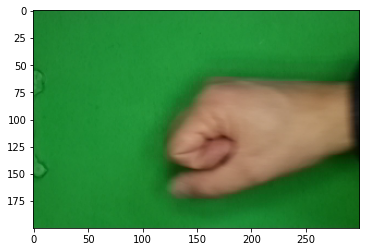

In [14]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  predictions = model.predict(images, batch_size=10)
  max_index = np.argmax(predictions[-1])
  classes = ('paper', 'rock', 'scissors')
  pred_class = classes[max_index]

  print(fn)
  print(pred_class)

Referensi:
- https://keras.io/guides
- https://www.kaggle.com/terminate9298/rock-paper-scissors
- https://www.kaggle.com/twhitehurst3/rock-paper-scissors-keras-cnn-99-accuracy
- https://androidkt.com/how-to-set-steps-per-epoch-validation-steps-and-validation-split-in-kerass-fit-method/